In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
from sklearn import decomposition

In [2]:
data=pd.read_csv("./secom.data",delimiter=" ",header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [7]:
data.describe

<bound method NDFrame.describe of           0        1          2          3       4      5         6       7    \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
5     2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
6     3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
7     3058.88  2690.15  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
8     2967.68  2600.47  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
9     3016.11  2428.37  2248.9000  1004.4692  0.7884  100.0  106.2400  0.1185   
10    2994.05  2548.21  2195.1222  1046.1468  1.3204  100.0  103.3400  0.12

### Missing values are imputed by filling with median

In [6]:
new_data = data.fillna(data.median())

In [10]:
new_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.441551,2495.866110,2200.551958,1395.383474,4.171281,100.0,101.116476,0.121825,1.462860,-0.000842,...,0.004974,82.403069,0.500096,0.015317,0.003846,3.067628,0.021458,0.016474,0.005283,99.652345
std,73.480841,80.228143,29.380973,439.837330,56.103721,0.0,6.209385,0.008936,0.073849,0.015107,...,0.001985,56.348694,0.003403,0.017174,0.003719,3.576899,0.012354,0.008805,0.002866,93.864558
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,0.004700,72.288900,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,100.0,104.530000,0.123800,1.516850,0.008400,...,0.004700,72.288900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [13]:
new_data.shape

(1567, 590)

### Removing columns that have a single constant value throughout the dataset 

In [16]:
cols = data.nunique()==1
sampled_data=new_data.drop(list(data.columns[cols]),axis=1)

In [17]:
sampled_data.shape

(1567, 474)

### Scaling the data, finding a covariant matrix and its eigen values, vectors

In [19]:
scaled_data=StandardScaler().fit_transform(sampled_data)

In [20]:
scaled_data

array([[ 0.22446277,  0.84952284, -0.43643041, ..., -0.19016503,
        -0.23833416, -0.29575278],
       [ 1.10728747, -0.38310645,  1.01697712, ...,  0.41196985,
         0.25027203,  1.15684568],
       [-1.11400023,  0.798901  , -0.48144669, ...,  3.62714289,
         3.32151091, -0.17895472],
       ...,
       [-0.4850642 , -1.44741189,  0.1957007 , ..., -0.89454923,
        -0.97124344, -0.59817214],
       [-1.62708678,  0.45065767, -0.80072794, ...,  0.91185541,
         0.77377865, -0.06562872],
       [-0.94642009, -0.56240252, -0.17389446, ..., -0.03111053,
        -0.2732346 ,  0.4063752 ]])

In [23]:
scaled_data.shape

(1567, 474)

In [21]:
covariant_matrix = np.matmul(scaled_data.T,scaled_data)

In [22]:
covariant_matrix

array([[1567.        , -225.90035547,    7.31324533, ...,  -40.53430186,
         -44.12836514,    6.55814984],
       [-225.90035547, 1567.        ,    9.21920072, ...,   26.72712913,
          15.46307906,   69.81278391],
       [   7.31324533,    9.21920072, 1567.        , ...,  -45.89207857,
         -48.17468887,  -51.3399677 ],
       ...,
       [ -40.53430186,   26.72712913,  -45.89207857, ..., 1567.        ,
        1526.6899308 ,  612.43619768],
       [ -44.12836514,   15.46307906,  -48.17468887, ..., 1526.6899308 ,
        1567.        ,  609.93664955],
       [   6.55814984,   69.81278391,  -51.3399677 , ...,  612.43619768,
         609.93664955, 1567.        ]])

In [24]:
covariant_matrix.shape

(474, 474)

In [26]:
values,vectors = eigh(covariant_matrix)

In [27]:
values

array([-5.30827850e-14,  1.24440739e-14,  2.84952098e-13,  4.07598911e-13,
        6.78026523e-13,  2.94764950e-07,  1.03397273e-05,  1.28284434e-04,
        4.14830248e-04,  4.90169224e-04,  6.18019574e-04,  1.08672745e-03,
        2.55230422e-03,  3.71502474e-03,  3.97943661e-03,  5.47744555e-03,
        5.67069581e-03,  6.18012341e-03,  6.75068619e-03,  7.13477913e-03,
        8.08436908e-03,  1.12135379e-02,  1.33919741e-02,  1.42546723e-02,
        1.52665284e-02,  1.64840364e-02,  2.06802053e-02,  2.43945360e-02,
        2.64216193e-02,  3.00232648e-02,  3.28949102e-02,  3.54097527e-02,
        4.28791454e-02,  4.80209785e-02,  5.14296888e-02,  7.40364404e-02,
        7.78820006e-02,  8.72572776e-02,  9.35095547e-02,  1.04211154e-01,
        1.06873660e-01,  1.27039159e-01,  1.31054631e-01,  1.35328503e-01,
        1.38382097e-01,  1.48672855e-01,  1.63268517e-01,  1.71126072e-01,
        1.79155996e-01,  1.81481406e-01,  1.96681819e-01,  2.14337823e-01,
        2.24625493e-01,  

In [28]:
vectors

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.92275940e-03,  2.48802929e-02,  6.07086181e-03],
       [-2.94894309e-14, -1.23743364e-14, -3.02402441e-14, ...,
         2.99368586e-03, -1.29197217e-02,  6.72409699e-06],
       [ 2.20298488e-12,  1.00879728e-12, -3.42898508e-13, ...,
         8.32425427e-03, -8.97660917e-03,  3.85955507e-03],
       ...,
       [-9.82886553e-14, -6.68972437e-14, -4.83521684e-14, ...,
        -3.73043953e-04, -2.15985016e-02,  4.09044141e-04],
       [ 3.29188606e-14,  2.64312534e-14,  1.66530434e-14, ...,
        -8.24567441e-04, -1.78782591e-02,  1.18206223e-04],
       [ 5.46254518e-14,  4.67715566e-15, -1.15776362e-14, ...,
         1.05724388e-02, -1.74728765e-02, -1.50329181e-02]])

In [29]:
vectors.shape

(474, 474)

### PCA

In [32]:
pca = decomposition.PCA(scaled_data)
pca.n_components = 474
pca_data = pca.fit_transform(scaled_data)

In [33]:
pca_data

array([[-1.69471245e+00,  2.92544730e+00,  3.89093851e+00, ...,
        -1.31044855e-16,  4.06570420e-16,  1.63956940e-16],
       [-2.24724670e+00,  8.77508003e-01,  2.88158444e+00, ...,
         2.68282950e-16,  6.03542086e-16, -9.15059778e-17],
       [ 4.42979482e-01,  1.23259834e+00,  1.14511604e+00, ...,
        -1.41475948e-16,  4.75849428e-16, -1.48958384e-16],
       ...,
       [-1.16963623e+00, -1.77305867e+00, -1.61996813e+00, ...,
         2.28632506e-16, -2.47733072e-16,  4.37464593e-17],
       [-1.17665509e+00, -3.23470099e+00, -3.49620016e+00, ...,
        -8.74478648e-17, -4.44003643e-17, -6.77889291e-17],
       [ 1.95332462e+00, -3.01287098e+00, -2.61802918e+00, ...,
        -2.19687243e-16,  7.43042745e-17, -7.88664218e-17]])

In [34]:
pca.explained_variance_

array([2.63633688e+01, 1.72743886e+01, 1.33923210e+01, 1.20672691e+01,
       1.03899213e+01, 9.85089401e+00, 9.36521585e+00, 8.70194890e+00,
       8.53612401e+00, 7.69171544e+00, 6.92858488e+00, 6.31641050e+00,
       6.22095270e+00, 6.06098346e+00, 5.99357961e+00, 5.66289344e+00,
       5.46800377e+00, 5.40084730e+00, 5.31395436e+00, 5.03717250e+00,
       4.89732003e+00, 4.78918927e+00, 4.71192980e+00, 4.58288439e+00,
       4.53726627e+00, 4.47509457e+00, 4.38684780e+00, 4.21697918e+00,
       4.12895524e+00, 4.01320156e+00, 3.95271790e+00, 3.88455715e+00,
       3.83404888e+00, 3.77433459e+00, 3.66948307e+00, 3.64494209e+00,
       3.57887822e+00, 3.54935338e+00, 3.45550698e+00, 3.41105623e+00,
       3.37765422e+00, 3.29946613e+00, 3.20866391e+00, 3.17397543e+00,
       3.15647304e+00, 3.11795646e+00, 3.03698198e+00, 2.97186294e+00,
       2.95049394e+00, 2.87837110e+00, 2.85416945e+00, 2.84066647e+00,
       2.78090436e+00, 2.69371574e+00, 2.65751997e+00, 2.65199254e+00,
      

In [35]:
cumulativeVariance = pca.explained_variance_ratio_.cumsum()

In [36]:
cumulativeVariance

array([0.05558343, 0.09200403, 0.12023984, 0.14568197, 0.16758764,
       0.18835686, 0.20810209, 0.22644891, 0.24444612, 0.26066302,
       0.27527095, 0.28858821, 0.30170421, 0.31448293, 0.32711955,
       0.33905896, 0.35058747, 0.36197439, 0.37317811, 0.38379827,
       0.39412358, 0.4042209 , 0.41415534, 0.4238177 , 0.43338389,
       0.44281899, 0.45206804, 0.46095894, 0.46966426, 0.47812552,
       0.48645927, 0.49464931, 0.50273286, 0.51069051, 0.51842709,
       0.52611193, 0.53365749, 0.5411408 , 0.54842625, 0.55561798,
       0.56273928, 0.56969574, 0.57646075, 0.58315263, 0.58980761,
       0.59638137, 0.60278442, 0.60905017, 0.61527087, 0.62133951,
       0.62735712, 0.63334626, 0.63920941, 0.64488872, 0.65049173,
       0.65608308, 0.66161673, 0.66701735, 0.67236426, 0.677612  ,
       0.68274128, 0.68781636, 0.69276544, 0.69765028, 0.70244533,
       0.70714945, 0.71178188, 0.71636852, 0.72091008, 0.72535255,
       0.72975141, 0.73406027, 0.73832906, 0.74257025, 0.74677

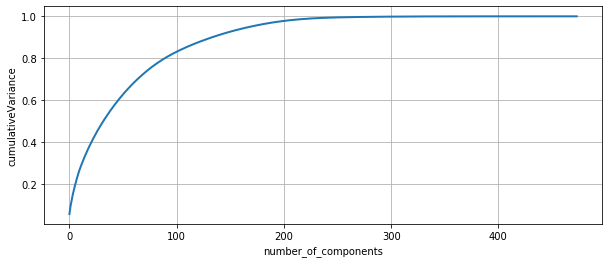

In [40]:
plt.figure(1, figsize=(10, 4))
plt.plot(cumulativeVariance, linewidth=2)
plt.xlabel('number_of_components')
plt.ylabel('cumulativeVariance')
plt.grid(True)
plt.show()

In [42]:
pca.n_components = 7
seven_principal_Components = pca.fit_transform(scaled_data)
principal_component = pd.DataFrame(data = seven_principal_Components,columns = ['Pc1','Pc2','Pc3','Pc4','Pc5','Pc6','Pc7'])

In [43]:
principal_component

,Pc1,Pc2,Pc3,Pc4,Pc5,Pc6,Pc7
0,-1.694762,2.926300,3.891828,-2.583404,-0.019013,-1.318468,-1.769795
1,-2.247272,0.878405,2.879981,-2.054411,-0.306198,-1.653457,-2.206193
2,0.442953,1.233057,1.143633,-0.382608,0.596771,2.071320,-2.181824
3,1.158809,5.130852,4.221269,-3.291201,2.953287,3.067086,-8.077018
4,0.753921,2.377676,2.558479,-0.022820,1.940201,3.318134,-4.573504
5,2.076371,2.876252,3.572950,-2.222249,1.797602,3.524030,-2.447530
6,-1.747057,4.526420,2.855542,-1.449833,0.442384,-1.398070,-2.998415
7,1.292054,2.011832,4.731008,-2.380881,0.420293,1.453287,-2.435612
8,-0.471801,19.142935,-3.487550,3.585841,0.443045,2.536908,-0.634174
9,1.303173,4.006073,5.717803,-2.979473,1.049478,2.445161,-2.440328


In [44]:
principal_component.shape

(1567, 7)